
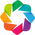

In [3]:
import holoviews as hv
import holoviews.util
hv.extension('bokeh')
import bokeh
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

from holoviews.operation.datashader import aggregate, shade, datashade, dynspread
from holoviews.operation import decimate

decimate.max_samples = 1000
dynspread.max_px = 20
dynspread.threshold = 0.5


In [2]:
output_notebook()

Loading BokehJS ...

In [4]:
xs = range(-10,11)
ys = [100-el**2 for el in xs]
curve = hv.Curve((xs, ys))
curve

:Curve   [x]   (y)

In [7]:
xvals = [0.1* i for i in range(100)]
curve =  hv.Curve((xvals, [np.sin(x) for x in xvals]))
scatter =  hv.Scatter((xvals[::5], np.linspace(0,1,20)))

In [26]:
curve + scatter

:Layout
   .Curve.I   :Curve   [x]   (y)
   .Scatter.I :Scatter   [x]   (y)

In [5]:
import xarray as xr

In [6]:
arr = xr.DataArray(np.random.rand(5,5), coords={'theta':np.linspace(0, 2, 5), 'phi': np.linspace(-1, 1, 5)}, 
                   dims=['theta', 'phi'])

arr3 = xr.DataArray(np.random.rand(50,50,50), coords={'theta':np.linspace(0, 2, 50), 
                                                      'phi': np.linspace(-1, 1, 50),
                                                      'eV': np.linspace(-1.3, 0.3, 50)}, 
                   dims=['theta', 'phi', 'eV'])

In [7]:
ds = hv.Dataset(xr.Dataset({'value': arr3}))

In [15]:
datashade(ds.to(hv.Image, ['theta', 'eV'], 'value', ['phi']))

:DynamicMap   [phi]